In [1]:
import os
import sys
from google.colab import drive

GDRIVE_PATH = '/content/gdrive'
PROJECT_PATH = os.path.join(GDRIVE_PATH, 'My Drive/CS631TFinalProject')
drive.mount(GDRIVE_PATH)
sys.path.append(PROJECT_PATH)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
os.chdir(PROJECT_PATH)

In [0]:
from __future__ import print_function

import os
import numpy as np

from skimage.io import imsave, imread

# path to images dataset. Recommended to write down entire path to avoid errors (i.e "C:/User/Desktop.../raw/)
data_path = 'raw/'

image_rows = 384
image_cols = 384


def create_train_data():
    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        try:
          img = imread(os.path.join(train_data_path, image_name), as_grey=True)
          img_mask = imread(os.path.join(train_data_path, image_mask_name), as_grey=True)
        except Exception as e:
          pass

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_validate_data():
    validate_data_path = os.path.join(data_path, 'validate')
    images = os.listdir(validate_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        try:
            parts = image_name.split('_')[0]
            img_val_id = int(parts[0] + parts[1])
            img = imread(os.path.join(validate_data_path, image_name), as_grey=True)
            img_mask = imread(os.path.join(validate_data_path, image_mask_name), as_grey=True)
        except Exception as e:
            print("ERRO: ", image_name)
            continue
        
        

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_validate.npy', imgs)
    np.save('imgs_mask_validate.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_validate_data():
    imgs_validate = np.load('imgs_validate.npy')
    imgs_mask_validate = np.load('imgs_mask_validate.npy')
    return imgs_validate, imgs_mask_validate


def create_test_data():
    test_data_path = os.path.join(data_path, 'test')
    images = os.listdir(test_data_path)
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int64)

    i = 0
    print('-'*30)
    print('Creating testing images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.png'
        try:
            parts = image_name.split('_')[0]
            img_id = int(parts[0] + parts[1])
            img = imread(os.path.join(test_data_path, image_name), as_grey=True)
            img_mask = imread(os.path.join(test_data_path, image_mask_name), as_grey=True)
        except Exception as e:
            print("ERRO: ", image_name)
            continue

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask
        imgs_id[i] = img_id

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    np.save('imgs_mask_test.npy', imgs_mask)
    np.save('imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')


def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_mask_test = np.load('imgs_mask_test.npy')
    imgs_id = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id, imgs_mask_test


In [0]:
ls raw/train/

In [0]:
try:
  create_validate_data()
  create_test_data()
  create_train_data()
except Exception as e:
  print(e)

In [0]:
import pandas as pd
df = pd.read_csv('model_1_logs.csv')
df.head()

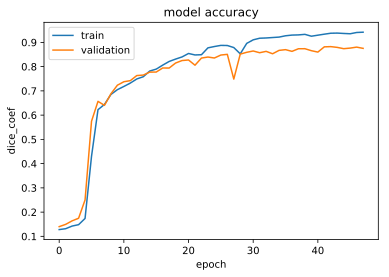

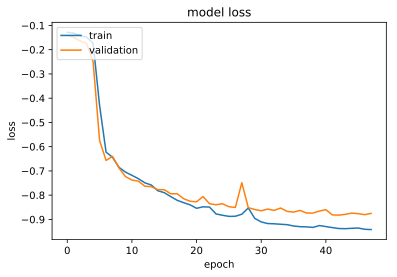

In [0]:
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['dice_coef'])
plt.plot(df['val_dice_coef'])
plt.title('model accuracy')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(df['loss'])
plt.plot(df['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
data.create_train_data()

In [0]:
import Unet_1024
Unet_1024.train_and_predict()


In [0]:
import Unet_1024
model = Unet_1024.get_unet()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.load_weights('weights.h5')

In [0]:
import data
import numpy as np
mean = 27.007275
std = 27.648466
imgs_train, imgs_mask_train = load_train_data()

imgs_train = Unet_1024.preprocess(imgs_train)
imgs_mask_train = Unet_1024.preprocess(imgs_mask_train)

imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]


imgs_test, imgs_id_test, imgs_mask_test = data.load_test_data()

imgs_test = Unet_1024.preprocess(imgs_test)
imgs_mask_test = Unet_1024.preprocess(imgs_mask_test)

imgs_test = imgs_test.astype('float32')
imgs_test -= mean
imgs_test /= std

imgs_mask_test = imgs_mask_test.astype('float32')

imgs_mask_test /= 255.  # scale masks to [0, 1]

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [0]:
lowest = 1
idx = 0
for i in range(len(imgs_test)):
  img = imgs_test[i].reshape(1, 384, 384, 1)
  mask = imgs_mask_test[i].reshape(1, 384, 384, 1)
  score = model.evaluate(img, mask)
  if score[2] < lowest:
    lowest = score[2]
    idx = i
    
    print('\nloss: ', score[0])
    print('dice_coef: ', score[2])
    print('similarity: ', score[1], '\n')

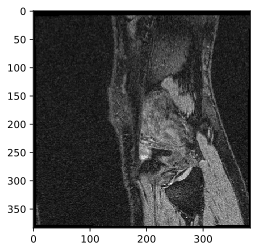

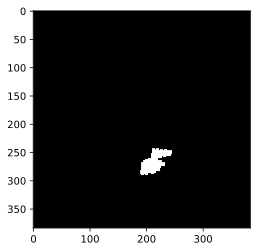

In [0]:
plt.imshow(imgs_test[idx].reshape(384, 384), cmap='gray')
plt.show()

plt.imshow(imgs_mask_test[idx].reshape(384, 384), cmap='gray')
plt.show()

1/1 [==============================] - 0s 75ms/step


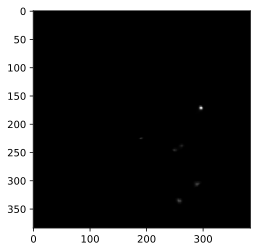

In [0]:
img = imgs_test[i].reshape(1, 384, 384, 1)
imgs_mask_test_pred = model.predict(img, verbose=1)

plt.imshow(imgs_mask_test_pred[0].reshape(384, 384), cmap='gray')
plt.show()

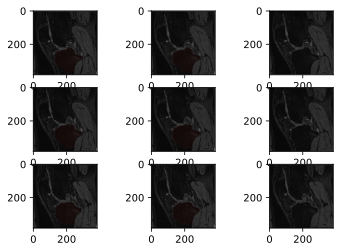

In [0]:
import matplotlib.pyplot as plt


rows = 3
cols = 3
fig = plt.figure()
fig.set_dpi(200)
for row in range(rows):
  j = 50 + row
  test_img = imgs_test[j].reshape(384, 384)
  mask = imgs_mask_test[j].reshape(384, 384)
  mask_pred = imgs_mask_test_pred[j].reshape(384, 384)
  
  mask = np.ma.masked_where(mask_pred < 0.5, mask)
  mask_pred = np.ma.masked_where(mask_pred < 0.5, mask_pred)
  
  
  ax1 = fig.add_subplot(rows,cols,row*cols+1)
  ax1.imshow(test_img, cmap="gray")
  ax1.imshow(mask, cmap="jet", alpha=0.3)
  
  ax1 = fig.add_subplot(rows,cols,row*cols + 2)
  ax1.imshow(test_img, cmap="gray")
  ax1.imshow(mask_pred, cmap="jet", alpha=0.3)
  
  ax1 = fig.add_subplot(rows,cols,row*cols + 3)
  ax1.imshow(test_img, cmap="gray")
  


In [0]:
from keras.preprocessing.image import ImageDataGenerator

imgs_train, imgs_mask_train = load_train_data()

imgs_train = Unet_1024.preprocess(imgs_train)
imgs_mask_train = Unet_1024.preprocess(imgs_mask_train)

imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]

data_gen_args = dict(featurewise_center=True,
                 featurewise_std_normalization=True,
                 rotation_range=45,
                 width_shift_range=0.2,
                 height_shift_range=0.2,
                 zoom_range=0.2)

seed = 1
imgs_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)
imgs_datagen.fit(imgs_train, augment=True, seed=seed)
mask_datagen.fit(imgs_mask_train, augment=True, seed=seed)

train_generator = zip(imgs_datagen.flow(imgs_train, batch_size=8, seed=seed),
                      mask_datagen.flow(imgs_mask_train, batch_size=8, seed=seed))







/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


8


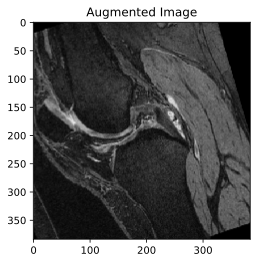

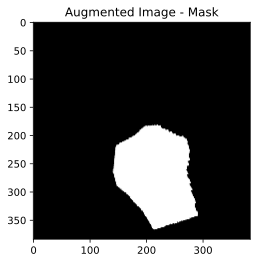

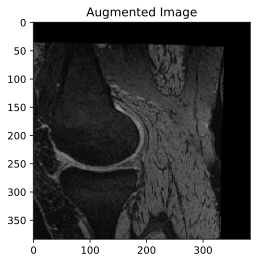

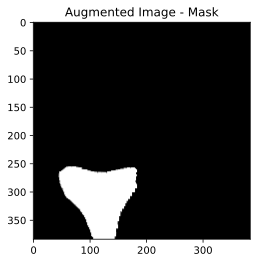

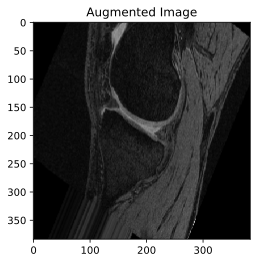

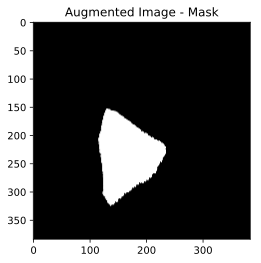

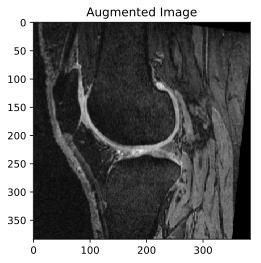

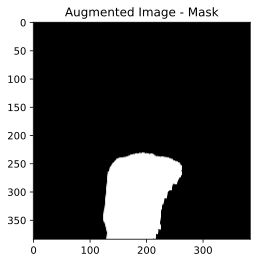

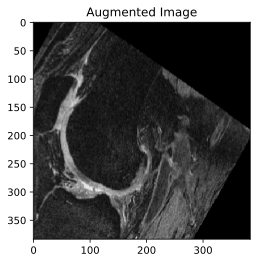

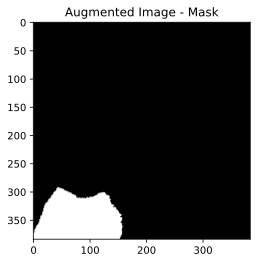

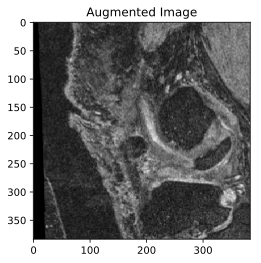

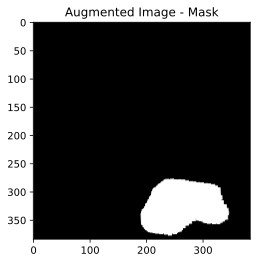

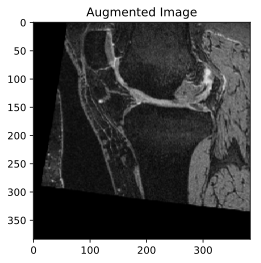

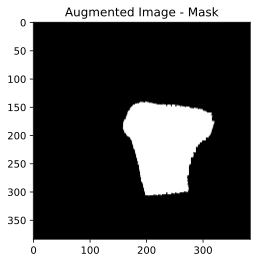

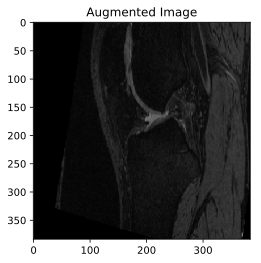

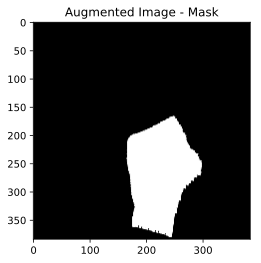

In [0]:
count = 0
for img, mask in train_generator:
    print(len(img))
    for i in range(8):
        plt.imshow(img[i].reshape(img[i].shape[0],img[i].shape[1]), cmap='gray')
        plt.title("Augmented Image")
        plt.show()
        plt.imshow(mask[i].reshape(img[i].shape[0],img[i].shape[1]), cmap="gray")
        plt.title("Augmented Image - Mask")
        plt.show()
    break

In [0]:
import data
import numpy as np

In [0]:
imgs_train, imgs_mask_train = data.load_train_data()

imgs_train = Unet_1024.preprocess(imgs_train)
imgs_mask_train = Unet_1024.preprocess(imgs_mask_train)

imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]

dataset_train = Unet_1024.create_dataset(imgs_train, imgs_mask_train)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [0]:
dataset_train()

<DatasetV1Adapter shapes: ((1024, 384, 384, 1), (1024, 384, 384, 1)), types: (tf.float32, tf.float32)>

In [0]:
Unet_1024.train_model(tpu_model)

In [0]:
!pip install imgaug


In [0]:
%%bash

ggID="1Ub06dBjhCUykqDWJiFXeTjDFXx-U_aSy"
ggURL='https://drive.google.com/uc?export=download'  
filename="$(curl -sc /tmp/gcokie "${ggURL}&id=${ggID}" | grep -o '="uc-name.*</span>' | sed 's/.*">//;s/<.a> .*//')"  
getcode="$(awk '/_warning_/ {print $NF}' /tmp/gcokie)"  
curl -Lb /tmp/gcokie "${ggURL}&confirm=${getcode}&id=${ggID}" -o "${filename}" 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   2131      0 --:--:-- --:--:-- --:--:--  2131
100  811M    0  811M    0     0   133M      0 --:--:--  0:00:06 --:--:--  128M


In [0]:
!tar -xvzf valid.tar.gz

In [0]:
fname_img = './valid/valid_001_V00.im'
fname_seg = './valid/valid_001_V00.seg'

In [0]:
with h5py.File(fname_img,'r') as hf:
    img = np.array(hf['data'])

In [0]:
img = img.astype(np.float32)

0.0008291463
0.00071596244


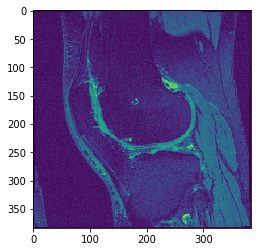

In [0]:
plt.imshow(img[:,:,50])
mean = np.mean(img)
std = np.std(img)
print(mean)
print(std)

In [0]:
img.dtype

dtype('float32')

In [0]:
im2 = img.copy()
im2 -= mean
im2 /= std
mean = np.mean(im2)
std = np.std(im2)
print(mean)
print(std)

1.9167032e-06
0.99999994


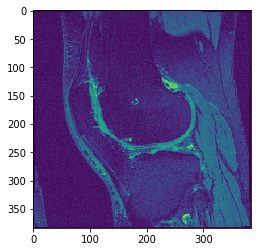

In [0]:
plt.imshow(img[:,:,50])

In [0]:
np.argwhere(im2 > 1).shape

(3847558, 3)

In [0]:
def convert_set(img_files, masks_files, save_to='imgs'):
  imgs = []
  imgs_mask = []
  imgs_ids = []
  for f, m in zip(img_files, masks_files):
    with h5py.File(f,'r') as hf:
      img = np.array(hf['data'])
    imgs.append(img[:,:,20:140:2])
    
    with h5py.File(m,'r') as hf:
      mask = np.array(hf['data'])
    imgs_mask.append(mask[:,:,20:140:2,0])
    
    img_id = int(f.split('_')[1])
    imgs_ids.append(img_id)

  imgs = np.concatenate(imgs, axis=2)
  np.save('imgs_'+save_to+'.npy', imgs)
  imgs_mask = np.concatenate(imgs_mask, axis=2)
  np.save('imgs_mask_' + save_to + '.npy', imgs_mask)
  np.save('imgs_id_' + save_to + '.npy', imgs_ids)
  
  return imgs, imgs_mask, imgs_ids

In [0]:
import glob

files = sorted(glob.glob('valid/*.im'))
masks = sorted(glob.glob('valid/*.seg'))

train, valid, test = files[:20],files[20:24],files[24:]
train_mask, valid_mask, test_mask = masks[:20],masks[20:24],masks[24:]
print(train)
print(valid)
print(test)
convert_set(train, train_mask, 'train')
convert_set(valid, valid_mask, 'validate')
convert_set(test, test_mask, 'test')
0

['valid/valid_001_V00.im', 'valid/valid_001_V01.im', 'valid/valid_002_V00.im', 'valid/valid_002_V01.im', 'valid/valid_003_V00.im', 'valid/valid_003_V01.im', 'valid/valid_004_V00.im', 'valid/valid_004_V01.im', 'valid/valid_005_V00.im', 'valid/valid_005_V01.im', 'valid/valid_006_V00.im', 'valid/valid_006_V01.im', 'valid/valid_007_V00.im', 'valid/valid_007_V01.im', 'valid/valid_008_V00.im', 'valid/valid_008_V01.im', 'valid/valid_009_V00.im', 'valid/valid_009_V01.im', 'valid/valid_010_V00.im', 'valid/valid_010_V01.im']
['valid/valid_011_V00.im', 'valid/valid_011_V01.im', 'valid/valid_012_V00.im', 'valid/valid_012_V01.im']
['valid/valid_013_V00.im', 'valid/valid_013_V01.im', 'valid/valid_014_V00.im', 'valid/valid_014_V01.im']


0

In [0]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from data import *
import Unet_1024

Using TensorFlow backend.


In [0]:
Unet_1024.train_and_predict()

------------------------------
Loading and preprocessing train data...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


ValueError: ignored

/content/gdrive


'My Drive'/


/content


gdrive/             imgs_train_mask.npy  imgs_valid.npy  valid.tar.gz
imgs_test_mask.npy  imgs_train.npy       sample_data/
imgs_test.npy       imgs_valid_mask.npy  valid/


gdrive/              imgs_test.npy        imgs_valid.npy  valid.tar.gz
imgs_mask_test.npy   imgs_train.npy       sample_data/
imgs_mask_train.npy  imgs_valid_mask.npy  valid/


gdrive/              imgs_mask_validate.npy  imgs_validate.npy  valid.tar.gz
imgs_mask_test.npy   imgs_test.npy           sample_data/
imgs_mask_train.npy  imgs_train.npy          valid/


In [0]:
ls

gdrive/  sample_data/  valid/  valid.tar.gz


In [0]:
imgs_train, imgs_mask_train = Unet_1024.load_train_data()

In [0]:
imgs_train.shape

(384, 384, 3200)

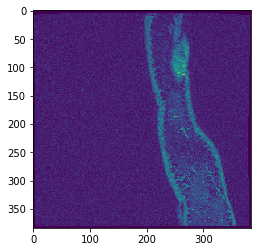

In [0]:
plt.imshow(np.transpose(imgs_train,(2,0,1))[0])


In [0]:
cd /content/gdrive/

/content


In [0]:
ls

gdrive/               imgs_mask_test.npy      imgs_train.npy     valid.tar.gz
imgs_id_test.npy      imgs_mask_train.npy     imgs_validate.npy
imgs_id_train.npy     imgs_mask_validate.npy  sample_data/
imgs_id_validate.npy  imgs_test.npy           valid/


In [0]:
ls

0_preds/      imgs_id_test.npy        imgs_test.npy      __pycache__/
0_weights.h5  imgs_mask_test.npy      imgs_train.npy     raw/
data/         imgs_mask_train.npy     imgs_validate.npy  Unet_1024.py
data.py       imgs_mask_validate.npy  model_1_logs.csv


In [0]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def preprocess(imgs):
    if imgs.ndim == 4:
      imgs = imgs[:,:,:,0]
    print(imgs.shape)
    imgs = np.transpose(imgs,(2,0,1))
    imgs = np.expand_dims(imgs, 3)
    return imgs
  
def train_and_predict():
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    imgs_train, imgs_mask_train = load_train_data()

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std

    imgs_mask_train = imgs_mask_train.astype('float32')
    # imgs_mask_train /= 255.  # scale masks to [0, 1]

    print('-' * 30)
    print('Loading and preprocessing validation data...')
    print('-' * 30)
    imgs_validate, imgs_mask_validate = load_validate_data()

    imgs_validate = preprocess(imgs_validate)
    imgs_mask_validate = preprocess(imgs_mask_validate)

    imgs_validate = imgs_validate.astype('float32')
    imgs_validate -= mean
    imgs_validate /= std

    imgs_mask_validate = imgs_mask_validate.astype('float32')
    # imgs_mask_validate /= 255.  # scale masks to [0, 1]

    
    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = Unet_1024.get_unet()
    callbacks = [tf.keras.callbacks.ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(monitor='val_dice_coef', patience=5, min_delta=0, mode='max'),
                 tf.keras.callbacks.CSVLogger('model_1_logs.csv')]

    print('-'*30)
    print('Fitting model...')
    print('-'*30)

    # Fitting model; increment epochs appropriately (default epochs=300, default batch_size=8)
    history = model.fit(imgs_train, imgs_mask_train, batch_size=8, epochs=100, verbose=1, shuffle=False,
              validation_data=(imgs_validate, imgs_mask_validate),
              callbacks=callbacks)
    
    del imgs_train
    del imgs_mask_train
    print('-'*30)
    print('Loading and preprocessing test data...')
    print('-'*30)
    imgs_test, imgs_id_test, imgs_mask_test = load_test_data()

    imgs_test = preprocess(imgs_test)
    imgs_mask_test = preprocess(imgs_mask_test)

    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std

    imgs_mask_test = imgs_mask_test.astype('float32')
    # imgs_mask_test /= 255.  # scale masks to [0, 1] 

    # evaluate the model
    print('-' * 30)
    print('Evaluating the model on test data...')
    print('-' * 30)

    score = model.evaluate(imgs_test, imgs_mask_test)
    print('\nloss: ', score[0])
    print('dice_coef: ', score[2])
    print('similarity: ', score[1], '\n')


    # list all data in history
    print(history.history.keys())

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.title('model accuracy')
    plt.ylabel('dice_coef')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)
    # model.load_weights('weights.h5')

    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
    imgs_mask_test_pred = model.predict(imgs_test, verbose=1)

    # np.save('imgs_mask_test.npy', imgs_mask_test_pred)

    print('-' * 30)
    print('Saving predicted masks to files...')
    print('-' * 30)
    pred_dir = 'preds'
    if not os.path.exists(pred_dir):
        os.mkdir(pred_dir)
    for image, image_id in zip(imgs_mask_test_pred, imgs_id_test):
        image = (image[:, :, 0] * 255.).astype(np.uint8)
        imsave(os.path.join(pred_dir, str(image_id) + '_pred.png'), image)



In [0]:
import gc
gc.collect()
train_and_predict()

In [0]:
import gc
gc.collect()

71

In [0]:
imgs_test, imgs_id_test, imgs_mask_test = load_test_data()

In [0]:
for i in range(160):
  print(i)
  plt.imshow(255 * imgs_mask_test[:,:,i,0])
  plt.show()